# [Advanced] PySpark Know-How in Pratice 

## Tips to improve product engineering memory efficency by Partitioning

In this notebook, there would be a lot of advanced Spark Tips introduced that can be applied to boost the data processing. So Hang Tight! 

We all know that **Spark** is an **engine for parallel processing engine of data on nodes** 

Parallelism allows to perform millions tasks simultaneosly on numerous number of machines in a cluster independently. Under the hood, each dataframe (RDD) is stored in partitions on different cluster nodes. Partition basically is a logical chunk of a large distributed data set. 

It provides the possibility to distribute the work across the cluster, divide the task into smaller parts, and reduce memory requirements for each node. Partition is the main unit of parallelism in Apache Spark.

[Reference](https://luminousmen.com/)

In [2]:
import pandas as pd
import numpy as np
from datetime import date, timedelta, datetime
import time

import pyspark # only run this after findspark.init()
from pyspark.sql import SparkSession, SQLContext
from pyspark.context import SparkContext
from pyspark.sql.functions import * 
from pyspark.sql.types import * 

In [3]:
import findspark
findspark.init()

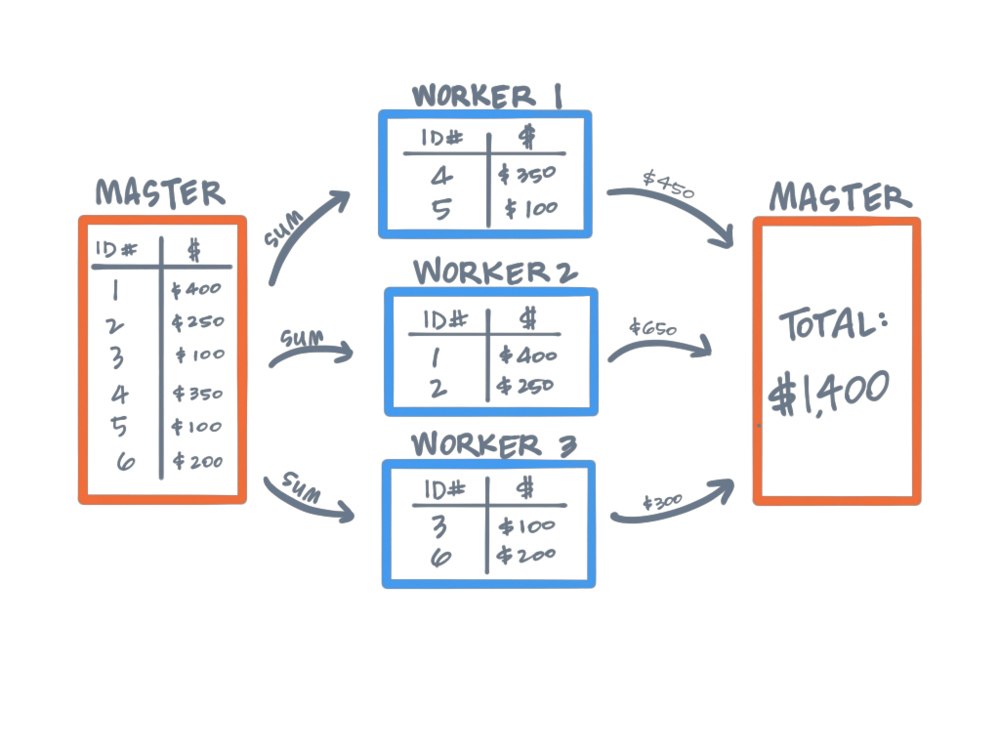

In [4]:
from IPython.display import Image
file_name1 = './img/sparkpartition.png'
Image(file_name1)

In [5]:
sc = SparkContext("local", "First App")

In [6]:
rdd = sc.parallelize([1,2,3,4,5,6,7,8],2)

In [7]:
data = rdd.glom()
print(data.collect())

[[1, 2, 3, 4], [5, 6, 7, 8]]


## Another example

In [8]:
# Create an RDD of integers with 4 partitions
rdd = sc.parallelize([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 4)

# Use the glom() method to see the partitions of the RDD
print("Original RDD partitions:", rdd.glom().collect())

 
# Use the coalesce() method to reduce the number of partitions
coalesced_rdd = rdd.coalesce(2)

 
# Print the partitions of the coalesced RDD
print("Coalesced RDD partitions:", coalesced_rdd.glom().collect())


# Use the repartition() method to increase the number of partitions
repartitioned_rdd = coalesced_rdd.repartition(3)
 

# Print the partitions of the repartitioned RDD
print("Repartitioned RDD partitions:", repartitioned_rdd.glom().collect())

Original RDD partitions: [[1, 2], [3, 4], [5, 6], [7, 8, 9, 10]]
Coalesced RDD partitions: [[1, 2, 3, 4], [5, 6, 7, 8, 9, 10]]
Repartitioned RDD partitions: [[], [1, 2, 3, 4], [5, 6, 7, 8, 9, 10]]
